In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['00 train test valid Code For Exergy.ipynb', '00 train test valid Code For HHV.ipynb', '00 train test valid Code For PCC.ipynb', '00 train test valid Code For Power1.ipynb', '00 train test valid First 8 Algorithm hydrogen.ipynb', '00 train test valid hydrogen2.ipynb', '00 train test valid Power 2 MLP-XGB.ipynb', 'DATAA.csv', 'DATAB.csv', 'DATAC.csv']


In [2]:

data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data= data.sample(n=14000000, replace=True,random_state=40)
#data.head()

In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  14000000
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02,8.845259e+02,1.940772e+03,5.011099e+02,1.060035e+03,1.304881e+02,5.316594e+02,3.757400e+02,2.618043e+03,4.513303e+02,8.835112e+03
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01,1.485544e+02,7.347840e+02,1.266483e+02,2.257114e+02,4.134890e+01,1.636060e+02,7.081412e+01,9.911687e+02,8.658797e+01,2.038003e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709994e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055915e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854768e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259394e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466632e+02,6.566271e+02,4.287083e+02,3.377095e+03,5.089730e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06
mean,5.073223e+01,6.357268e+00,6.842195e-01,3.142033e-01,3.621320e+01,5.390684e+00,3.769029e+02,7.639171e+02,4.935451e+02,8.394322e+02,8.843573e+02,1.941200e+03,5.012421e+02,1.059917e+03,1.304891e+02,5.316005e+02,3.757498e+02,2.618612e+03,4.512885e+02,8.835861e+03
std,1.246673e+01,1.102640e+00,6.694934e-01,5.978500e-01,1.380047e+01,6.528400e+00,5.883965e+01,2.051812e+02,8.871853e+01,7.000108e+01,1.485141e+02,7.341667e+02,1.266764e+02,2.257368e+02,4.132918e+01,1.636401e+02,7.076834e+01,9.903449e+02,8.656169e+01,2.039051e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.460580e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056363e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.855058e+02,7.579628e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259498e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421768e+02,8.350085e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466901e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.089044e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.061818e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:

col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T", "LNG_MF"]
col_target = ["CO2_P"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(9800000, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02,8.845259e+02,1.940772e+03,5.011099e+02,1.060035e+03
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01,1.485544e+02,7.347840e+02,1.266483e+02,2.257114e+02
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03


In [13]:
target_vars.describe()

,CO2_P
count,9.800000e+06
mean,5.316594e+02
std,1.636060e+02
min,0.000000e+00
25%,4.371646e+02
50%,5.468958e+02
75%,6.566271e+02
max,7.665257e+02


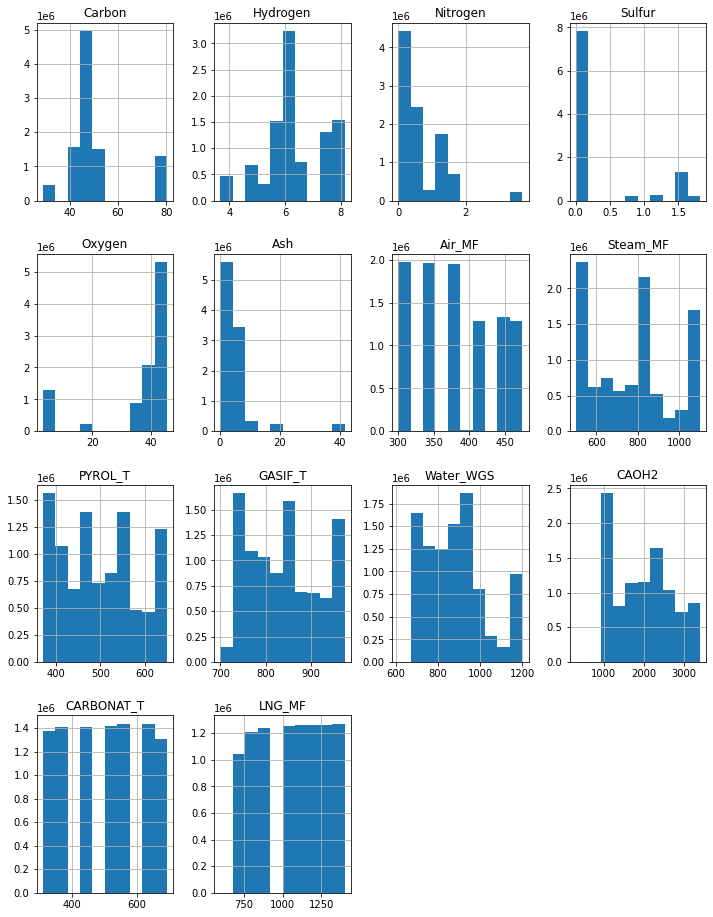

In [14]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

<AxesSubplot:>

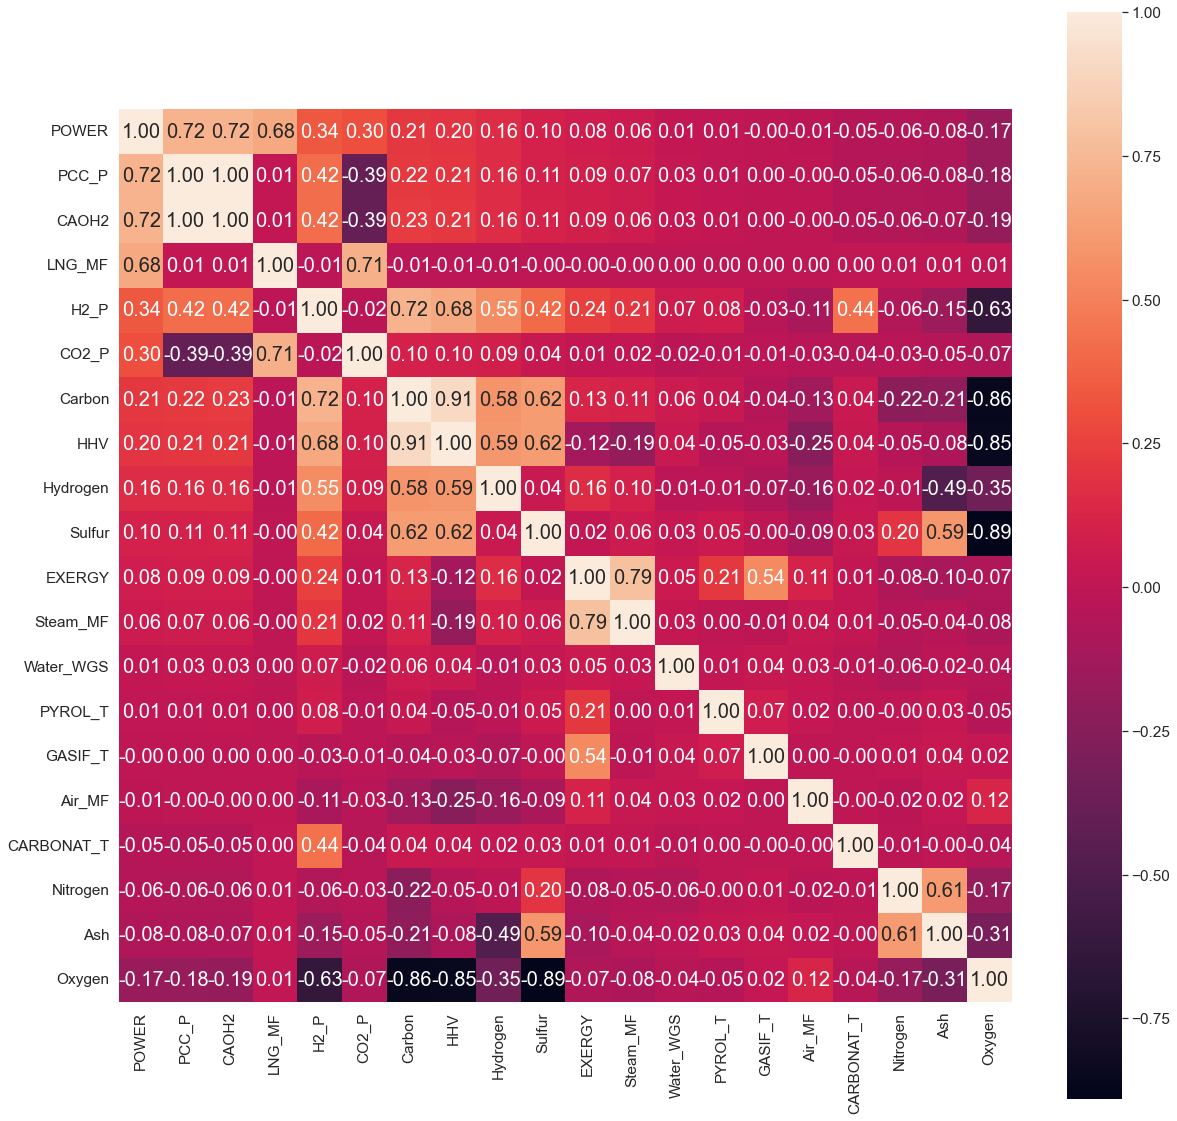

In [15]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'POWER')['POWER'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [16]:
train_X = train[col_randoms]
train_y = train[col_target]
train_X.shape

(9800000, 14)

In [17]:
test_X = test[col_randoms]
test_y = test[col_target]
test_X.shape

(2800000, 14)

In [18]:
valid_X = valid[col_randoms]
valid_y = valid[col_target]
valid_X.shape

(1400000, 14)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values)]
test = test[list(test_X.columns.values)]
##
valid=valid[list(valid_X.columns.values)]
##
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

sc_valid=pd.DataFrame(columns=valid.columns, index=valid.index)
sc_valid[sc_valid.columns]=sc.fit_transform(valid)

In [20]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
3946963,-0.391855,-0.206654,-0.498150,-0.525157,0.621852,-0.385583,-1.307239,0.175101,-0.772763,-0.562978,0.440742,-0.872055,1.017700,0.620108
11714035,-1.620445,-2.425421,4.482115,2.508221,-1.263552,5.529470,1.668268,-0.068603,1.650862,1.580313,-0.232412,-1.171462,0.512364,-1.152067
11036878,-1.755796,-2.176269,-0.005424,1.431861,0.667499,2.223594,-1.307239,-0.507270,-1.054580,-0.920194,-0.367043,-1.103415,1.017700,-0.265979
12209073,2.369724,0.973300,-0.333908,2.117654,-2.395200,0.262117,-0.712138,1.637326,1.650862,0.151452,-1.242143,1.441551,-1.508981,-1.595110
7124077,-0.817084,-1.032622,-0.423494,-0.525157,0.667499,0.461174,0.478065,-1.140901,0.974502,0.508667,0.306111,-1.280338,1.523037,-1.595110


In [21]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
4515303,-0.391621,-0.206112,-0.499213,-0.525555,0.622210,-0.386111,-1.306992,0.175859,0.320733,0.793814,-0.904677,0.761135,0.511207,-0.708422
10652801,-0.099644,0.274552,0.232684,-0.408469,0.419319,-0.681742,-0.712155,-0.725784,0.974486,1.222378,-0.702676,-1.145789,-1.509690,1.063554
291521,-0.227183,-0.051937,-0.544023,-0.508829,0.583806,-0.641916,1.072356,1.637981,1.650782,-0.920446,0.105328,-0.566902,0.511207,-1.151416
9481896,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,0.477519,1.637981,-0.378107,1.579516,-1.241346,-1.281998,0.005983,-1.594410
9364153,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,1.072356,0.906920,-1.392551,-0.206171,0.105328,1.850806,1.521656,0.620560


In [22]:
sc_valid.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
7740477,-0.562271,-0.458730,-1.004767,-0.525456,0.647907,-0.020039,-0.116004,0.175519,-1.393047,0.150627,2.122034,-1.279708,-0.498878,1.507124
282381,-0.226155,-0.050774,-0.542576,-0.508735,0.583401,-0.641280,1.073542,1.637926,0.636342,-0.206474,-0.232953,-0.864720,0.512174,-1.151314
11075918,-1.754320,-2.172146,-0.005839,1.430878,0.667477,2.214597,1.668316,-0.580058,0.298110,-0.206474,-1.107663,-0.463338,1.523226,0.620978
11895403,0.258846,0.162949,0.989169,-0.357328,0.002875,-0.548170,-0.710777,-1.043153,1.651036,1.579030,-0.367524,-1.279708,-1.004404,-1.594387
1128215,0.021720,0.103343,-0.453120,-0.492014,0.414525,-0.793919,1.073542,0.419254,0.974573,-0.563574,-0.232953,-0.123184,0.512174,-0.265168


In [23]:
train_X =  sc_train
test_X =  sc_test
valid_X=sc_valid

In [24]:
test_X.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
4515303,-0.391621,-0.206112,-0.499213,-0.525555,0.622210,-0.386111,-1.306992,0.175859,0.320733,0.793814,-0.904677,0.761135,0.511207,-0.708422
10652801,-0.099644,0.274552,0.232684,-0.408469,0.419319,-0.681742,-0.712155,-0.725784,0.974486,1.222378,-0.702676,-1.145789,-1.509690,1.063554
291521,-0.227183,-0.051937,-0.544023,-0.508829,0.583806,-0.641916,1.072356,1.637981,1.650782,-0.920446,0.105328,-0.566902,0.511207,-1.151416
9481896,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,0.477519,1.637981,-0.378107,1.579516,-1.241346,-1.281998,0.005983,-1.594410
9364153,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,1.072356,0.906920,-1.392551,-0.206171,0.105328,1.850806,1.521656,0.620560


In [25]:
test_y.head()

,CO2_P
4515303,479.797678
10652801,711.492689
291521,437.164581
9481896,382.298959
9364153,141.946343


In [26]:
train_X.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
3946963,-0.391855,-0.206654,-0.498150,-0.525157,0.621852,-0.385583,-1.307239,0.175101,-0.772763,-0.562978,0.440742,-0.872055,1.017700,0.620108
11714035,-1.620445,-2.425421,4.482115,2.508221,-1.263552,5.529470,1.668268,-0.068603,1.650862,1.580313,-0.232412,-1.171462,0.512364,-1.152067
11036878,-1.755796,-2.176269,-0.005424,1.431861,0.667499,2.223594,-1.307239,-0.507270,-1.054580,-0.920194,-0.367043,-1.103415,1.017700,-0.265979
12209073,2.369724,0.973300,-0.333908,2.117654,-2.395200,0.262117,-0.712138,1.637326,1.650862,0.151452,-1.242143,1.441551,-1.508981,-1.595110
7124077,-0.817084,-1.032622,-0.423494,-0.525157,0.667499,0.461174,0.478065,-1.140901,0.974502,0.508667,0.306111,-1.280338,1.523037,-1.595110


In [27]:

from sklearn.ensemble import RandomForestRegressor


In [28]:
models = [
           ['RandomForest ',RandomForestRegressor()],
         ]

In [29]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 80
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Valid_R2_Score"]=metrics.r2_score(valid_y, curr_model.predict(valid_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    curr_model_data["Valid_RMSE_Score"] = sqrt(mean_squared_error(valid_y,curr_model.predict(valid_X)))

    model_data.append(curr_model_data)

In [30]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Valid_R2_Score,Test_RMSE_Score,Valid_RMSE_Score
0,RandomForest,4849.323442,0.999996,0.999973,0.999973,0.84706,0.854581


In [31]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 200],
              'n_estimators' : [100,200],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 200],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200]}],
             scoring='r2', verbose=2)

In [32]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 100}

In [33]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=80, random_state=40)

In [34]:
grid_search.best_estimator_.score(train_X,train_y)

0.9999961612502323

In [35]:
grid_search.best_estimator_.score(test_X,test_y)

0.999973101308881

In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.8487021611935545

In [37]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

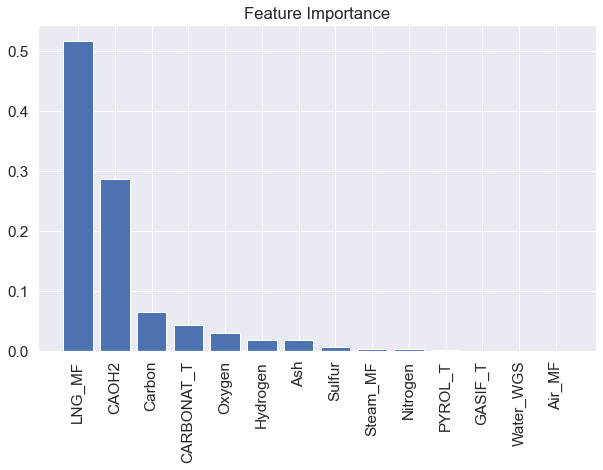

In [38]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [39]:
names[0:5]

['LNG_MF', 'CAOH2', 'Carbon', 'CARBONAT_T', 'Oxygen']

In [40]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [41]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

RandomForestRegressor(max_depth=80, random_state=40)

In [42]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9885618381507609
Testing set R2 Score -  0.9884643977506817
Testing set RMSE Score -  17.57558829119598
